In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#loading the dataset
#the data is a pickle file which stores a list
#the list has 2 elements : x and y

In [0]:
import pickle

In [0]:
x,y = pickle.load(open("/content/gdrive/My Drive/8th Semester Project/data.pickle","rb"))

In [0]:
#Checking if the number of samples is the same for both x and y

In [6]:
len(x)

100000

In [7]:
len(y)

100000

In [0]:
assert len(x) == len(y)

In [0]:
#importing libraries
#need sklearn to split the data into train and test

In [0]:
import sklearn
import numpy as np

In [11]:
import keras

Using TensorFlow backend.


In [0]:
#some images have only one channel 
#so need to convert them into 3
#use sklearn for this

In [0]:
from skimage.color import gray2rgb

In [0]:
for i in range(len(x)):
  if(x[i].shape !=(64,64,3)):
    x[i] = gray2rgb(x[i])

In [0]:
#checking if all images have three channels

In [0]:
error = 0

In [0]:
for i in range(len(x)):
  if(x[i].shape !=(64,64,3)):
    error+=1

In [18]:
error

0

In [0]:
#data augmentation

In [0]:
import random
import skimage as sk
from skimage import transform
from skimage import util

In [0]:
#Type 1 : Horizontal Flip

In [0]:
def horizontal_flip(image_array):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [0]:
#Type 2 : Random Noise

In [0]:
def random_noise(image_array):
  return sk.util.random_noise(image_array)

In [0]:
#Type 3 : Random Rotation

In [0]:
def random_rotation(image_array):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

In [0]:
#Transform Example

In [0]:
image = x[0]

In [29]:
image.shape

(64, 64, 3)

In [0]:
import matplotlib.pyplot as plt

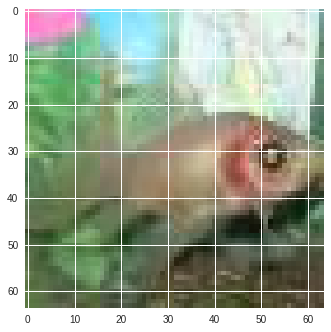

In [31]:
plt.imshow(image)

In [32]:
y[0]

0

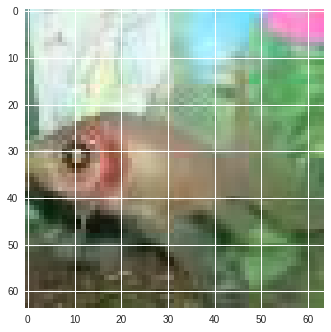

In [33]:
#Horizontal flip

image_flipped = horizontal_flip(image)

plt.imshow(image_flipped)

In [34]:
image_flipped.shape

(64, 64, 3)

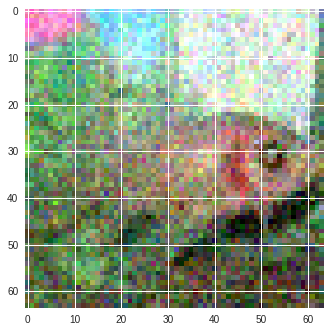

In [35]:
#Random Noise

image_noise = random_noise(image)

plt.imshow(image_noise)

In [36]:
image_noise.shape

(64, 64, 3)

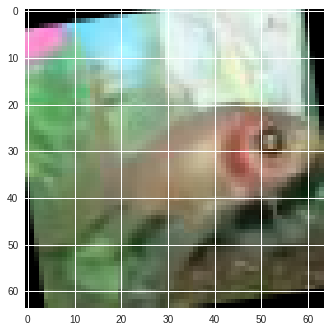

In [37]:
#Random Rotation

image_rotated = random_rotation(image)

plt.imshow(image_rotated)

In [38]:
image_rotated.shape

(64, 64, 3)

In [39]:
len(x)

100000

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [42]:
for i in range(100000):
  img = x[i]
  op = y[i]
  img_r = datagen.random_transform(img)
  x.append(img_r)
  y.append(op)
  if(i%1000==0):
    print("Done for : ",i,"/100000")

Done for :  0 /100000
Done for :  1000 /100000
Done for :  2000 /100000
Done for :  3000 /100000
Done for :  4000 /100000
Done for :  5000 /100000
Done for :  6000 /100000
Done for :  7000 /100000
Done for :  8000 /100000
Done for :  9000 /100000
Done for :  10000 /100000
Done for :  11000 /100000
Done for :  12000 /100000
Done for :  13000 /100000
Done for :  14000 /100000
Done for :  15000 /100000
Done for :  16000 /100000
Done for :  17000 /100000
Done for :  18000 /100000
Done for :  19000 /100000
Done for :  20000 /100000
Done for :  21000 /100000
Done for :  22000 /100000
Done for :  23000 /100000
Done for :  24000 /100000
Done for :  25000 /100000
Done for :  26000 /100000
Done for :  27000 /100000
Done for :  28000 /100000
Done for :  29000 /100000
Done for :  30000 /100000
Done for :  31000 /100000
Done for :  32000 /100000
Done for :  33000 /100000
Done for :  34000 /100000
Done for :  35000 /100000
Done for :  36000 /100000
Done for :  37000 /100000
Done for :  38000 /100000

In [43]:
len(x)

200000

In [44]:
len(y)

200000

In [0]:
for i in range(len(x)):
  if(x[i].shape !=(64,64,3)):
    error+=1

In [46]:
error

0

In [0]:
#Checking size of each class

In [0]:
size = {}

In [0]:
for i in range(len(x)):
  if(y[i] not in size):
    size[y[i]] = 1
  else:
    size[y[i]] += 1

In [50]:
set(size.values())

{1000}

In [0]:
#converting y into one hot encoded vectors

In [0]:
y = keras.utils.to_categorical(y, num_classes=200, dtype='float32')

In [0]:
#pickle.dump([x,y],open("/content/gdrive/My Drive/8th Semester Project/data_1.pickle","wb"))

In [0]:
#Train and Test Split

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [0]:
x_train = np.reshape(x_train,(-1,64,64,3))

In [0]:
x_test = np.reshape(x_test,(-1,64,64,3))

In [59]:
len(x_train)

170000

In [0]:
#Checking an image

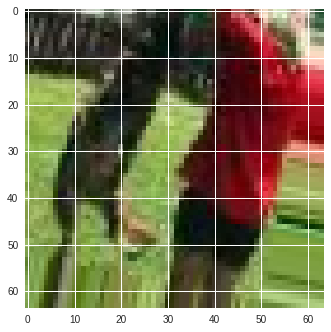

In [61]:
plt.imshow(x_train[0])

In [62]:
np.argmax(y_train[0])

28

In [0]:
assert len(x_train)==len(y_train) and len(x_test)==len(y_test)

In [64]:
x_train[0].shape

(64, 64, 3)

In [65]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
#making the CNN Model

In [0]:
from keras.models import Sequential

In [0]:
from keras import regularizers

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [0]:
batch_size = 512
num_classes = 200
number_of_epochs = 100

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64,64,3), padding='same',activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.40))

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))

model.add(Dense(200, activation='softmax' ))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [73]:
np.array([1,2,3])

array([1, 2, 3])

In [0]:
saver = keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/8th Semester Project/weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [0]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=number_of_epochs,verbose=1,validation_data=(x_test, y_test))

Train on 170000 samples, validate on 30000 samples
Epoch 1/100
170000/170000 [==============================] - 170s 1ms/step - loss: 7.5793 - acc: 0.0048 - val_loss: 5.2990 - val_acc: 0.0045
Epoch 2/100
170000/170000 [==============================] - 160s 942us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.2981 - val_acc: 0.0087
Epoch 3/100
170000/170000 [==============================] - 160s 944us/step - loss: 5.2828 - acc: 0.0071 - val_loss: 5.1637 - val_acc: 0.0090
Epoch 4/100
170000/170000 [==============================] - 160s 942us/step - loss: 5.1777 - acc: 0.0101 - val_loss: 5.1907 - val_acc: 0.0085
Epoch 5/100
170000/170000 [==============================] - 160s 941us/step - loss: 5.1375 - acc: 0.0128 - val_loss: 5.1157 - val_acc: 0.0154
Epoch 6/100
170000/170000 [==============================] - 160s 941us/step - loss: 5.0897 - acc: 0.0164 - val_loss: 5.1105 - val_acc: 0.0146
Epoch 7/100
170000/170000 [==============================] - 160s 941us/step - loss: 5.0418 -

In [0]:
model.save('/content/gdrive/My Drive/8th Semester Project/my_model_added_reg.h5')